# Quality Analysis (General)

#### Updated: May 19, 2023

#  

Quality analysis pipeline after phase 2 of Alouette processing (OCR processing phase):

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
rootDir = 'L:/DATA/Alouette_I/BATCH_I_Run2/'
resultDir = rootDir + '05_result/'
logDir = rootDir + '06_log/'

#  

#### Combine BATCH I and II:

#  

#### Stage 1 - Overall Statistics:

In [3]:
df_inventory = pd.read_csv(logDir + 'image_inventory.csv')
n_images = df_inventory['images'].sum()

In [4]:
df_s1 = pd.read_csv(resultDir + 'result_stage1_raw.csv', low_memory=False)

In [5]:
n_proc = len(df_s1.loc[df_s1['processed_image_class'] == 'num']) + len(df_s1.loc[df_s1['processed_image_class'] == 'dot'])
n_loss = len(df_s1.loc[df_s1['processed_image_class'] == 'loss'])
n_outlier = len(df_s1.loc[df_s1['processed_image_class'] == 'outlier'])
n_unproc = n_images - n_proc - n_outlier - n_loss

In [6]:
print('# of images: ' + str(n_images))
print('# of images processed after stage 1 processing: ' + str(n_proc))
print('% of images processed after stage 1 processing: ' + str(round(((n_proc/n_images)*100), 2)) + ' %')
print('')
print("% total loss after stage 1 processing: " + str(round((((n_unproc + n_loss + n_outlier)/n_images)*100), 2)) + ' %')
print('% of images unprocessed after stage 1 processing: ' + str(round(((n_unproc/n_images)*100), 2)) + ' %')
print("% of images classified as 'loss' after stage 1 processing: " + str(round(((n_loss/n_images)*100), 2)) + ' %')
print("% of images classified as 'outlier' after stage 1 processing: " + str(round(((n_outlier/n_images)*100), 2)) + ' %')

# of images: 885527
# of images processed after stage 1 processing: 769686
% of images processed after stage 1 processing: 86.92 %

% total loss after stage 1 processing: 13.08 %
% of images unprocessed after stage 1 processing: 5.02 %
% of images classified as 'loss' after stage 1 processing: 4.84 %
% of images classified as 'outlier' after stage 1 processing: 3.23 %


Breakdown 'loss' type:

In [7]:
df_loss_bd = df_s1.loc[df_s1['processed_image_class'] == 'loss'].groupby(['func_name']).count()[['filename']]
df_loss_bd.sort_values('filename', ascending=False)

,filename
func_name,
ionogram_content_extraction.extract_select_parameters.extract_fmin_and_max_depth,13025
image_segmentation.trim_raw_metadata.trimming_metadata,6582
ionogram_content_extraction.extract_all_coordinates_ionogram_trace.extract_coord_subdir,662
metadata_translation.determine_leftside_metadata_grid_mapping.extract_centroids_and_determine_type,250
image_segmentation.extract_ionogram_from_scan.extract_ionogram,17


Breakdown 'outlier' type:

In [8]:
df_outlier_bd = df_s1.loc[df_s1['processed_image_class'] == 'outlier'].groupby(['func_name']).count()[['filename']]
df_outlier_bd.sort_values('filename', ascending=False)

,filename
func_name,
image_segmentation.segment_images_in_subdir.segment_images: iono size outlier,27349
image_segmentation.segment_images_in_subdir.segment_images: metadata size outlier,1220


#  

#### Stage 2 - Overall Statistics:

In [9]:
df_s2 = pd.read_csv(resultDir + 'result_stage2_raw.csv', low_memory=False)

In [10]:
n_num2 = len(df_s2.loc[df_s2['processed_image_class'] == 'num2'])
n_num = len(df_s2.loc[df_s2['processed_image_class'] == 'num'])
n_dot = len(df_s2.loc[df_s2['processed_image_class'] == 'dot'])
n_proc2 = n_num2 + n_num + n_dot
n_loss = len(df_s2.loc[df_s2['processed_image_class'] == 'loss'])
n_outlier = len(df_s2.loc[df_s2['processed_image_class'] == 'outlier'])

In [11]:
print('# of images processed after stage 2 processing: ' + str(n_proc2))
print('% of images processed after stage 2 processing: ' + str(round(((n_proc2/n_images)*100), 2)) + ' %')
print('')
print("% of images classified as 'num2' after stage 2 processing: " + str(round(((n_num2/n_images)*100), 2)) + ' %')
print("% of images classified as 'num' after stage 2 processing: " + str(round(((n_num/n_images)*100), 2)) + ' %')
print("% of images classified as 'dot' after stage 2 processing: " + str(round(((n_dot/n_images)*100), 2)) + ' %')
print('')
print("% total loss after stage 2 processing: " + str(round((((n_unproc + n_loss + n_outlier)/n_images)*100), 2)) + ' %')
print("% of images classified as 'loss' after stage 2 processing: " + str(round(((n_loss/n_images)*100), 2)) + ' %')
print("% of images classified as 'outlier' after stage 2 processing: " + str(round(((n_outlier/n_images)*100), 2)) + ' %')

# of images processed after stage 2 processing: 29703
% of images processed after stage 2 processing: 3.35 %

% of images classified as 'num2' after stage 2 processing: 0.25 %
% of images classified as 'num' after stage 2 processing: 2.79 %
% of images classified as 'dot' after stage 2 processing: 0.32 %

% total loss after stage 2 processing: 6.09 %
% of images classified as 'loss' after stage 2 processing: 0.94 %
% of images classified as 'outlier' after stage 2 processing: 0.14 %


Breakdown 'loss' type:

In [12]:
df_s2_loss = df_s2.copy(deep=True).loc[df_s2['processed_image_class'] == 'loss']
df_s2_loss['loss_summary'] = df_s2_loss['func_name'] + ', ' + df_s2_loss['details'] 
df_loss_bd = df_s2_loss.groupby(['loss_summary']).count()[['filename']]
df_loss_bd.sort_values('filename', ascending=False)

,filename
loss_summary,
"ionogram_content_extraction.extract_select_parameters.extract_fmin_and_max_depth, OCR read metadata contains letters",8
"image_segmentation.segment_images_in_subdir.segment_images: iono size outlier, OCR read metadata contains letters",5


In [13]:
df_s2_loss = df_s2.loc[df_s2['processed_image_class'] == 'loss']
df_loss_bd = df_s2_loss.groupby(['details']).count()[['filename']]
df_loss_bd.sort_values('filename', ascending=False)

,filename
details,
metadata could not be read by OCR,5522
OCR read metadata contains letters,495
metadata was interpreted to be dot type,74
metadata was interpreted to be num type,22


Breakdown 'outlier' type:

In [14]:
df_s2_outlier = df_s2.loc[df_s2['processed_image_class'] == 'outlier']
df_outlier_bd = df_s2_outlier.groupby(['func_name']).count()[['filename']]
df_outlier_bd.sort_values('filename', ascending=False)

,filename
func_name,
image_segmentation.segment_images_in_subdir.segment_images: iono size outlier,1207
image_segmentation.segment_images_in_subdir.segment_images: metadata size outlier,22


#  

#### Master - Overall Statistics:

In [15]:
df_master = pd.read_csv(resultDir + 'result_master.csv', low_memory=False)
n_master = len(df_master.loc[(~pd.isna(df_master['Station_Code'])) & (df_master['time_quality'] == 1)])

In [16]:
n_tq1 = len(df_master.loc[df_master['time_quality'] == 1])
n_tq2 = len(df_master.loc[df_master['time_quality'] == 2])
n_tq3 = len(df_master.loc[df_master['time_quality'] == 3])
n_tq4 = len(df_master.loc[df_master['time_quality'] == 4])

In [17]:
print('# of images fully read after stage 2 processing: ' + str(n_master))
print('% of images fully read after stage 2 processing (yield): ' + str(round(((n_master/n_images)*100), 2)) + ' %')
print('')
print('% time quality level 1 yield: ' + str(round(((n_tq1/n_images)*100), 2)) + ' %')
print('% at least time quality level 2: ' + str(round((((n_tq1+n_tq2)/n_images)*100), 2)) + ' %')
print('% at least time quality level 3: ' + str(round((((n_tq1+n_tq2+n_tq3)/n_images)*100), 2)) + ' %')
print('% at least time quality level 4: ' + str(round((((n_tq1+n_tq2+n_tq3+n_tq4)/n_images)*100), 2)) + ' %')

# of images fully read after stage 2 processing: 23046
% of images fully read after stage 2 processing (yield): 2.6 %

% time quality level 1 yield: 2.6 %
% at least time quality level 2: 2.62 %
% at least time quality level 3: 2.64 %
% at least time quality level 4: 2.73 %


#  

#### Data distribution by ground station:

In [18]:
df2 = df_master.copy(deep=True)
df2['Station_Number_Station_Code_processed_image_class'] = df2['Station_Number'].astype(int).astype(str) + '_' + df2['Station_Code'] + '_' + df2['processed_image_class']

In [19]:
df_master_by_stn = df2.groupby(['Station_Number']).count()[['filename']].sort_values('filename', ascending=False)
df_master_by_stn.head(10)

,filename
Station_Number,
5.0,5818
1.0,3741
9.0,2281
13.0,1679
6.0,1509
3.0,1404
7.0,1237
12.0,1196
2.0,942


In [20]:
df_master_by_stnname = df2.groupby(['Station_Name']).count()[['filename']].sort_values('filename', ascending=False)
df_master_by_stnname.head(50)

,filename
Station_Name,
"Quito, Ecuador",5549
"Blossom Point, MD, USA",3603
"College, Fairbanks, AK, USA",3123
Falkland Islands (Islas Malvinas),2678
"St. John's, NL, Canada",1814
"Fort Myers, FL, USA",1273
"Lima, Peru",1115
"Prince Albert, SK, Canada",942
"Santiago, Chile",820


In [21]:
df_master_by_stn_code = df2.groupby(['Station_Number_Station_Code_processed_image_class']).count()[['filename']].sort_values('filename', ascending=False)
df_master_by_stn_code.head(20)

,filename
Station_Number_Station_Code_processed_image_class,
5_QUI_num,4292
1_BPT_num,3579
9_SOL_num,2241
5_COL_num,1448
13_COL_num,1368
7_QUI_num,1198
12_NEW_num,1136
6_LIM_num,1114
2_PRI_num,920


- show geographic distribution by metatype type 
- show geographic distribution by year

- show how each ground station used the same metadata type over time (metadata composition by ground station over time)


- Matplotlib - basemap
- cartopy
- ipyleaflet (interactive)
- plotly 

- make availability plot for each ground station
    - could be sparklines to show amount of data vs time, by ground station

In [22]:
df_master['Station_Code'].unique()

array(['NEW', 'OTT', 'PRI', 'ANT', 'SPT', 'TRO', 'WOO', 'RES', 'SOL',
       'GRK', 'QUI', 'COL', 'WNK', 'SNP', 'MOJ', 'FTM', 'JOB', 'ROS',
       'RAL', 'ULA', 'BPT', 'BAT', 'DAR', 'GIL', 'SNT', 'MAD', 'KNO',
       'HAW', 'LIM', 'KJP', 'BLR', 'BFR'], dtype=object)

In [23]:
df_master_stn = df_master.loc[df_master['Station_Code'] == 'COL']
len(df_master_stn)

3123

In [24]:
df_master_stn.head()

,Directory,Subdirectory,filename,processed_image_class,fmin,max_depth,Timestamp,time_quality,Station_Number,Station_Code,Station_Name,Lat,Lng
15,R014207929F,470,Image0168.png,dot,1.500000,1262.790698,1963-01-02 00:00:00,4.0,5.0,COL,"College, Fairbanks, AK, USA",64.9N,147.8W
19,R014207929F,470,Image0181.png,dot,1.560484,1446.511628,1963-01-02 00:00:00,4.0,5.0,COL,"College, Fairbanks, AK, USA",64.9N,147.8W
44,R014207929F,470,Image0189.png,dot,1.560484,688.372093,1963-01-02 00:00:00,4.0,5.0,COL,"College, Fairbanks, AK, USA",64.9N,147.8W
58,R014207929F,470,Image0437.png,dot,2.972727,1330.232558,1963-01-02 00:00:00,4.0,5.0,COL,"College, Fairbanks, AK, USA",64.9N,147.8W
59,R014207929F,470,Image0194.png,dot,1.552419,1155.813953,1963-01-02 00:00:00,4.0,5.0,COL,"College, Fairbanks, AK, USA",64.9N,147.8W


#  

#### Construct process_summary:

Load data:

In [25]:
print(len(df_inventory))
df_inventory.head()

2638


,Directory,Subdirectory,images,subdir_id
0,R014207815,3488-15A,273,R014207815_3488-15A
1,R014207815,3489-15A,281,R014207815_3489-15A
2,R014207815,3490-15A,198,R014207815_3490-15A
3,R014207815,3491-8A,289,R014207815_3491-8A
4,R014207815,3492-8A,334,R014207815_3492-8A


In [26]:
df_process_log = pd.read_csv(logDir + 'process_log.csv')
print(len(df_process_log))
df_p1 = df_process_log.sort_values('Process_timestamp', ascending=True)
df_p1 = df_p1.drop_duplicates(subset=['subdir_id'], keep='last') 
print(len(df_p1))
df_p1.head()

2728
2639


,Directory,Subdirectory,Images_processed,Images_dot,Images_num,Images_loss,Images_outlier,Process_time,Process_timestamp,User,subdir_id
0,R014207821,3343-38A,320.0,0.0,314.0,0.0,6.0,195.038564,2023-06-02 21:09:03.663018,Rav_Super2,R014207821_3343-38A
1,R014207942,1985-1A,296.0,0.0,272.0,9.0,15.0,356.434266,2023-06-02 21:15:21.548098,Rav_Super2,R014207942_1985-1A
2,R014207978F,349,437.0,425.0,1.0,10.0,1.0,705.768378,2023-06-02 21:16:49.776073,Rav_Super1,R014207978F_349
3,R014207948,1689-9B,347.0,0.0,313.0,5.0,29.0,433.711368,2023-06-02 21:18:01.641518,Rav_Super5,R014207948_1689-9B
4,R014207823,3598-50A,220.0,0.0,150.0,65.0,5.0,424.822451,2023-06-02 21:18:24.384342,Rav_Super6,R014207823_3598-50A


In [27]:
df_process_log2 = pd.read_csv(logDir + 'process_log_OCR.csv')
print(len(df_process_log2))
df_p2 = df_process_log2.sort_values('Process_timestamp', ascending=True)
df_p2 = df_p2.drop_duplicates(subset=['subdir_id'], keep='last') 
print(len(df_p2))
df_p2.head()

119
119


,Directory,Subdirectory,Process_time,Process_timestamp,User,subdir_id
0,R014207844,2889-43B,1005.765122,2023-06-07 12:12:39.062165,Rav_SuperHP4,R014207844_2889-43B
1,R014207821,3325-15A,1291.077647,2023-06-07 12:34:10.973654,Rav_SuperHP4,R014207821_3325-15A
2,R014207967,1445-5A,204.089671,2023-06-07 12:49:38.052339,Rav_SuperHP2,R014207967_1445-5A
3,R014207964,1593-12A,181.256849,2023-06-07 12:52:39.363190,Rav_SuperHP2,R014207964_1593-12A
4,R014207979F,280,1256.904071,2023-06-07 12:55:08.147266,Rav_SuperHP4,R014207979F_280


In [28]:
df_pp = pd.read_csv(resultDir + 'result_postprocess_raw.csv', low_memory=False)

Construct process_summary:

In [29]:
df_sum1 = df_inventory.merge(df_p1[['Images_processed', 'Images_loss', 'Images_outlier', 'Process_time', 'subdir_id']], how='left', on='subdir_id')
df_sum1 = df_sum1.rename(columns={
    'images': 'n_images',
    'Images_loss': 'n_stage1_loss',
    'Images_outlier': 'n_stage1_outlier',
    'Process_time': 'process_time_stage1'
})
df_sum1['n_stage1_processed'] = df_sum1['Images_processed'] - df_sum1['n_stage1_loss'] - df_sum1['n_stage1_outlier']
df_sum1['n_stage1_unprocessed'] = df_sum1['n_images'] - df_sum1['Images_processed']
df_sum1 = df_sum1[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                  'n_stage1_outlier', 'process_time_stage1', 'subdir_id']]
print(len(df_sum1))
df_sum1.sample(10)

2638


,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,subdir_id
473,R014207841,3121-13B,331,177.0,0.0,143.0,11.0,959.967292,R014207841_3121-13B
2565,R014207979F,288,421,0.0,421.0,0.0,0.0,36.285410,R014207979F_288
98,R014207816,3406-A43,313,308.0,0.0,0.0,5.0,393.502101,R014207816_3406-A43
2472,R014207975,1122-12B,384,378.0,1.0,0.0,5.0,503.700541,R014207975_1122-12B
572,R014207844,2921-43B,329,83.0,1.0,238.0,7.0,631.262735,R014207844_2921-43B
961,R014207938,964-A,297,282.0,5.0,0.0,10.0,433.102901,R014207938_964-A
1435,R014207949,2163-4B,354,0.0,354.0,0.0,0.0,399.809446,R014207949_2163-4B
55,R014207815,3543-12A,330,300.0,0.0,20.0,10.0,510.353892,R014207815_3543-12A
1745,R014207957,2594-5B,331,320.0,1.0,1.0,9.0,1055.567440,R014207957_2594-5B
290,R014207824,3178-13B,329,121.0,0.0,199.0,9.0,90.436982,R014207824_3178-13B


In [30]:
df_sum2 = df_sum1.merge(df_p2[['Process_time', 'subdir_id']], how='left', on='subdir_id')
df_sum2 = df_sum2.rename(columns={
    'Process_time': 'process_time_stage2'
})
df_sum2 = df_sum2[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                  'n_stage1_outlier', 'process_time_stage1', 'process_time_stage2', 'subdir_id']]
print(len(df_sum2))
df_sum2.sample(10)

2638


,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,process_time_stage2,subdir_id
554,R014207844,2902-43B,297,284.0,0.0,2.0,11.0,542.724293,NaN,R014207844_2902-43B
99,R014207816,3407-143,319,305.0,1.0,1.0,12.0,199.366158,NaN,R014207816_3407-143
2437,R014207975,1087-B,358,349.0,0.0,1.0,8.0,683.044541,NaN,R014207975_1087-B
2249,R014207967,1426-3A,311,185.0,7.0,105.0,14.0,259.110694,NaN,R014207967_1426-3A
1690,R014207956,2357-7A,334,325.0,4.0,1.0,4.0,442.578024,NaN,R014207956_2357-7A
1938,R014207960,2551-5B,346,332.0,9.0,0.0,5.0,969.578004,NaN,R014207960_2551-5B
909,R014207938,911-A,378,357.0,6.0,5.0,10.0,631.282680,NaN,R014207938_911-A
116,R014207816,3425-50A,311,227.0,0.0,67.0,17.0,168.826653,NaN,R014207816_3425-50A
880,R014207930F,656,360,313.0,10.0,15.0,22.0,542.080464,NaN,R014207930F_656
25,R014207815,3513-19A,337,325.0,0.0,5.0,7.0,573.224546,NaN,R014207815_3513-19A


In [31]:
df_s2['subdir_id'] = df_s2['Directory'] + '_' + df_s2['Subdirectory']
df_sum3_ = pd.DataFrame()

for i in range(0, len(df_sum2)):
    subdir_id = df_sum2['subdir_id'].iloc[i]
    df_s2_ = df_s2[['processed_image_class', 'filename', 'subdir_id']].loc[df_s2['subdir_id'] == subdir_id]
    if len(df_s2_) > 0:
        n_s2_proc = len(df_s2_.loc[df_s2_['processed_image_class'] == 'num2']) + len(df_s2_.loc[df_s2_['processed_image_class'] == 'num']) + len(df_s2_.loc[df_s2_['processed_image_class'] == 'dot'])
        n_s2_loss = len(df_s2_.loc[df_s2_['processed_image_class'] == 'loss'])
        n_s2_outlier = len(df_s2_.loc[df_s2_['processed_image_class'] == 'outlier'])
        row = pd.DataFrame({
            'n_stage2_processed': n_s2_proc,
            'n_stage2_loss': n_s2_loss,
            'n_stage2_outlier': n_s2_outlier,
            'subdir_id': subdir_id
        }, index=[0])
        df_sum3_ = pd.concat([df_sum3_, row])

df_sum3 = df_sum2.merge(df_sum3_, how='left', on='subdir_id')
df_sum3 = df_sum3[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                  'n_stage1_outlier', 'process_time_stage1', 'process_time_stage2', 'n_stage2_processed', 'n_stage2_loss',
                  'n_stage2_outlier', 'subdir_id']]

In [32]:
print(len(df_sum3))
df_sum3.sample(10)

2638


,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,process_time_stage2,n_stage2_processed,n_stage2_loss,n_stage2_outlier,subdir_id
1612,R014207954,2219-18B,351,332.0,5.0,1.0,13.0,441.291100,NaN,NaN,NaN,NaN,R014207954_2219-18B
1252,R014207946,1859-1B,277,251.0,4.0,6.0,16.0,595.704493,NaN,NaN,NaN,NaN,R014207946_1859-1B
2306,R014207968,1242-13B,323,307.0,5.0,4.0,7.0,726.921221,NaN,NaN,NaN,NaN,R014207968_1242-13B
1110,R014207942,1956-9B,338,314.0,2.0,3.0,19.0,648.053835,NaN,NaN,NaN,NaN,R014207942_1956-9B
1094,R014207942,1940-5A,229,210.0,2.0,4.0,13.0,225.684112,NaN,NaN,NaN,NaN,R014207942_1940-5A
679,R014207908F,566,413,406.0,0.0,0.0,7.0,714.080225,224.005516,405.0,1.0,7.0,R014207908F_566
2292,R014207968,1228-5A,392,375.0,2.0,7.0,8.0,980.378492,NaN,NaN,NaN,NaN,R014207968_1228-5A
1489,R014207951,2456-8A,326,251.0,6.0,58.0,11.0,235.200001,NaN,NaN,NaN,NaN,R014207951_2456-8A
376,R014207840,3024-43A,72,40.0,0.0,27.0,5.0,130.465758,NaN,NaN,NaN,NaN,R014207840_3024-43A
1292,R014207947,1899-9B,210,197.0,2.0,0.0,11.0,255.318467,NaN,NaN,NaN,NaN,R014207947_1899-9B


In [33]:
df_pp['subdir_id'] = df_pp['Directory'] + '_' + df_pp['Subdirectory']
df_sum4_ = pd.DataFrame()

for i in range(0, len(df_sum3)):
    subdir_id = df_sum3['subdir_id'].iloc[i]
    df_pp_ = df_pp[['processed_image_class', 'filename', 'subdir_id']].loc[df_pp['subdir_id'] == subdir_id]
    if len(df_pp_) > 0:
        n_pp_proc = len(df_pp_.loc[df_pp_['processed_image_class'] == 'num2']) + len(df_pp_.loc[df_pp_['processed_image_class'] == 'num']) + len(df_pp_.loc[df_pp_['processed_image_class'] == 'dot'])
        n_pp_loss = len(df_pp_.loc[df_pp_['processed_image_class'] == 'loss'])
        n_pp_outlier = len(df_pp_.loc[df_pp_['processed_image_class'] == 'outlier'])
        row = pd.DataFrame({
            'n_postprocess_processed': n_pp_proc,
            'n_postprocess_loss': n_pp_loss,
            'n_postprocess_outlier': n_pp_outlier,
            'subdir_id': subdir_id
        }, index=[0])
        df_sum4_ = pd.concat([df_sum4_, row])

df_sum4 = df_sum3.merge(df_sum4_, how='left', on='subdir_id')
df_sum4 = df_sum4[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                  'n_stage1_outlier', 'process_time_stage1', 'process_time_stage2', 'n_stage2_processed', 'n_stage2_loss',
                  'n_stage2_outlier', 'n_postprocess_processed', 'n_postprocess_loss', 'n_postprocess_outlier', 'subdir_id']]

In [34]:
print(len(df_sum4))
df_sum4.sample(10)

2638


,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,process_time_stage2,n_stage2_processed,n_stage2_loss,n_stage2_outlier,n_postprocess_processed,n_postprocess_loss,n_postprocess_outlier,subdir_id
806,R014207929F,459,379,369.0,2.0,4.0,4.0,636.162022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207929F_459
83,R014207816,3391-A13,323,316.0,1.0,0.0,6.0,293.705011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207816_3391-A13
471,R014207841,3119-13B,323,144.0,0.0,178.0,1.0,505.411757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207841_3119-13B
2540,R014207978F,350,422,409.0,0.0,11.0,2.0,367.660420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207978F_350
125,R014207821,3313-15A,311,168.0,1.0,139.0,3.0,254.264731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207821_3313-15A
2008,R014207962,1481-5A,297,275.0,3.0,4.0,15.0,469.389003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207962_1481-5A
53,R014207815,3541-12A,305,288.0,0.0,1.0,16.0,576.335807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207815_3541-12A
1384,R014207949,2112-5B,345,334.0,2.0,2.0,7.0,1088.022770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207949_2112-5B
421,R014207841,3069-13B,344,0.0,344.0,0.0,0.0,44.115202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207841_3069-13B
1717,R014207956,2386-1B,313,296.0,1.0,7.0,9.0,1517.444651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207956_2386-1B


In [35]:
df_master['subdir_id'] = df_master['Directory'] + '_' + df_master['Subdirectory']
df_sum5_ = pd.DataFrame()

for i in range(0, len(df_sum4)):
    subdir_id = df_sum4['subdir_id'].iloc[i]
    df_master_ = df_master[['processed_image_class', 'filename', 'subdir_id']].loc[df_master['subdir_id'] == subdir_id]
    if len(df_master_) > 0:
        n_mas = len(df_master_)
        n_mas_num2 = len(df_master_.loc[df_master_['processed_image_class'] == 'num2'])
        n_mas_num = len(df_master_.loc[df_master_['processed_image_class'] == 'num'])
        n_mas_dot = len(df_master_.loc[df_master_['processed_image_class'] == 'dot'])
        row = pd.DataFrame({
            'n_master': n_mas,
            'n_master_num2': n_mas_num2,
            'n_master_num': n_mas_num,
            'n_master_dot': n_mas_dot,
            'subdir_id': subdir_id
        }, index=[0])
        df_sum5_ = pd.concat([df_sum5_, row])

df_sum5 = df_sum4.merge(df_sum5_, how='left', on='subdir_id')
df_sum5 = df_sum5[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                  'n_stage1_outlier', 'process_time_stage1', 'process_time_stage2', 'n_stage2_processed', 'n_stage2_loss',
                  'n_stage2_outlier', 'n_postprocess_processed', 'n_postprocess_loss', 'n_postprocess_outlier', 
                  'n_master', 'n_master_num2', 'n_master_num', 'n_master_dot', 'subdir_id']]

In [36]:
print(len(df_sum5))
df_sum5.sample(10)

2638


,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,process_time_stage2,n_stage2_processed,n_stage2_loss,n_stage2_outlier,n_postprocess_processed,n_postprocess_loss,n_postprocess_outlier,n_master,n_master_num2,n_master_num,n_master_dot,subdir_id
1260,R014207947,1867-6A,266,245.0,8.0,2.0,11.0,332.016422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207947_1867-6A
2506,R014207978F,316,353,334.0,3.0,12.0,4.0,479.493942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207978F_316
2464,R014207975,1114-A,397,153.0,1.0,227.0,16.0,99.491842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207975_1114-A
1639,R014207955,2846-50B,301,19.0,2.0,270.0,10.0,641.528956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207955_2846-50B
1324,R014207948,1691-5A,321,309.0,1.0,0.0,11.0,1110.704640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207948_1691-5A
1944,R014207960,2557-5B,334,318.0,0.0,5.0,11.0,839.400263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207960_2557-5B
1997,R014207962,1469-1B,339,322.0,6.0,3.0,8.0,702.186062,184.17542,322.0,3.0,8.0,322.0,3.0,8.0,317.0,0.0,317.0,0.0,R014207962_1469-1B
1682,R014207956,2349-1B,338,0.0,338.0,0.0,0.0,62.307579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207956_2349-1B
1350,R014207948,1717-9B,346,332.0,1.0,1.0,12.0,634.024459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207948_1717-9B
611,R014207907F,497,392,354.0,6.0,17.0,15.0,568.531917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207907F_497


In [37]:
df_sum5.to_csv(logDir + 'process_summary.csv', index=False)

#  

#### Plot histograms to characterize quality of processed subdirectories:

In [38]:
df_summary = pd.read_csv(logDir + 'process_summary.csv')
df_summary.head()

,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,process_time_stage2,n_stage2_processed,n_stage2_loss,n_stage2_outlier,n_postprocess_processed,n_postprocess_loss,n_postprocess_outlier,n_master,n_master_num2,n_master_num,n_master_dot,subdir_id
0,R014207815,3488-15A,273,256.0,0.0,4.0,13.0,1258.799828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207815_3488-15A
1,R014207815,3489-15A,281,266.0,0.0,10.0,5.0,1087.995773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207815_3489-15A
2,R014207815,3490-15A,198,192.0,1.0,2.0,3.0,608.420317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207815_3490-15A
3,R014207815,3491-8A,289,283.0,0.0,0.0,6.0,505.898933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207815_3491-8A
4,R014207815,3492-8A,334,321.0,1.0,3.0,9.0,670.250495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207815_3492-8A


<Axes: xlabel='pc_stage1_processed', ylabel='Percent'>

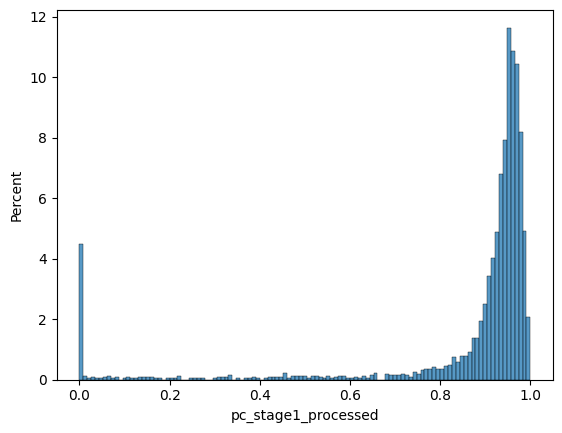

In [39]:
df_summary['pc_stage1_processed'] = df_summary['n_stage1_processed']/df_summary['n_images']
sns.histplot(data=df_summary, x='pc_stage1_processed', stat='percent')

<Axes: xlabel='pc_stage2_processed', ylabel='Percent'>

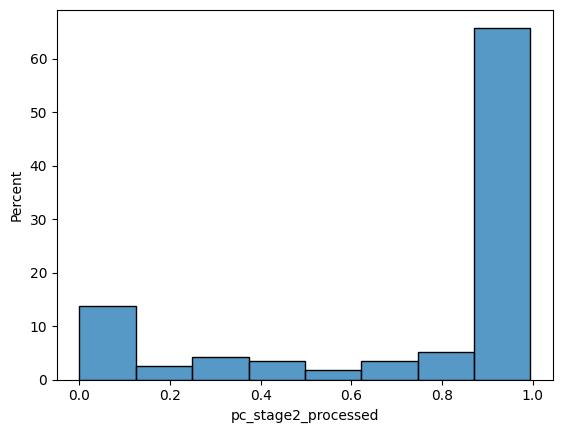

In [40]:
df_summary['pc_stage2_processed'] = df_summary['n_stage2_processed']/df_summary['n_images']
sns.histplot(data=df_summary, x='pc_stage2_processed', stat='percent')

<Axes: xlabel='pc_postprocess_processed', ylabel='Percent'>

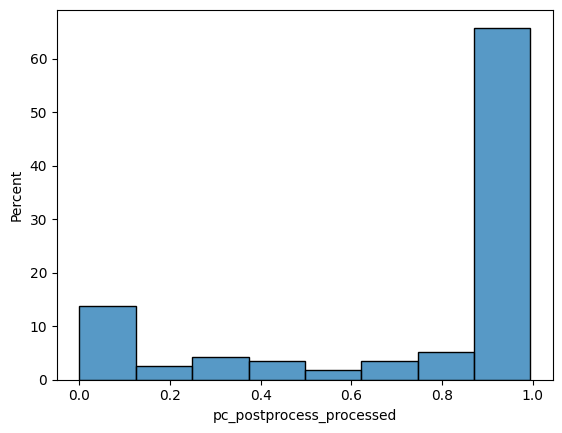

In [41]:
df_summary['pc_postprocess_processed'] = df_summary['n_postprocess_processed']/df_summary['n_images']
sns.histplot(data=df_summary, x='pc_postprocess_processed', stat='percent')

<Axes: xlabel='yield', ylabel='Percent'>

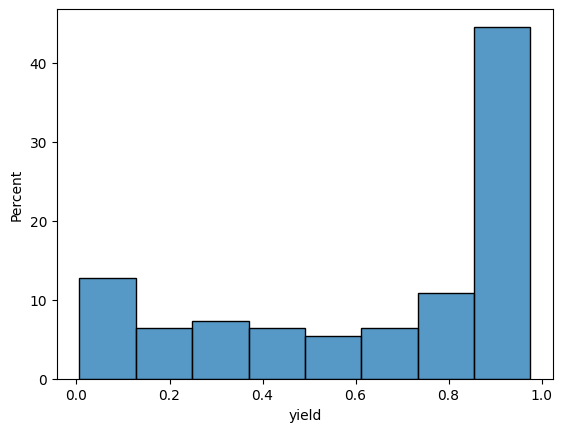

In [42]:
df_summary['yield'] = df_summary['n_master']/df_summary['n_images']
sns.histplot(data=df_summary, x='yield', stat='percent')